# Ford GoBike System Data Exploration
## by Sarah Alwadaah
- <a href='#PW'>1. Preliminary Wrangling</a>
    - <a href='#G'>1.1 Gather Data</a>
    - <a href='#C'>1.2 Clean Data</a>
- <a href='#UE'>2. Univariate Exploration</a>
- <a href='#BE'>3. Bivariate Exploration</a>
- <a href='#ME'>4. Multivariate Exploration</a>


## Preliminary Wrangling <a id='PW'></a>

This document explores data for Ford GoBike system that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data I chose covers entries from June 28th 2017 to December 31st 2019. I'll first gather data by downloading zipped CSV from [Ford GoBike System Data](https://www.fordgobike.com/system-data), Then I'll take a look to have a general idea to clean it.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
from zipfile import ZipFile
from io import BytesIO
import glob


%matplotlib inline

### Gather Data <a id='G'></a>

First to gather my data, I'll specify my zipped CSV files for download by listing all download urls, then creating a folder in my root to save my files then I'll extract all zip files and combine them in one panda dataframe. My data come from [Ford GoBike System Data](https://www.fordgobike.com/system-data).

In [2]:
# load dataset to pandas dataframe

# list url for all files to download from the internet
urls = ['https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201812-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip']

In [3]:
# make directory if it doesn't already exist
folder_name = 'ford-gobike'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# I used references for handling and extracting zip files: 
# ref1: https://stackoverflow.com/questions/49515617/how-to-download-zip-file-and-parse-csv-file-from-it-in-python
# ref2: https://stackoverflow.com/questions/3451111/unzipping-files-in-python

for url in urls:
    response = requests.get(url)
    zip_file = ZipFile(BytesIO(response.content))
    zip_file.extractall('ford-gobike')

In [5]:
# read all files and append in one dataframe
path = r'ford-gobike'
all_files = glob.glob(path + "/*.csv")

df_list = []

for file in all_files:
    df = pd.read_csv(file, header=0)
    df_list.append(df)

rides = pd.concat(df_list)

/Users/sarahalwadaah/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sarahalwadaah/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sarahalwadaah/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
# high-level overview of data shape and composition
print(rides.shape)
print(rides.dtypes)

(4890404, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
rental_access_method        object
dtype: object


In [10]:
# to have a look at the first columns
rides.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No,NaN
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No,NaN
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No,NaN
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No,NaN
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes,NaN


### Clean Data: <a id='C'></a>
The data coming from [Ford GoBike System Data](https://www.fordgobike.com/system-data) for 2017 - 2019 has 4890404 rides and 15 features. The 'rental_access_method' was introduced later and didn't exist in the previous years so must entries for that column are null. In this section, I'll clean my data by fixing columns datatypes, introducing a new column and dropping the ones I will not use in my analysis. Starting with datatypes as seen in previous cell, both start_time and end_time are of type string. I'll fix this to datetime so I can use them easliy in the next section:

In [11]:
# change datatype from string to datetime
rides['start_time'] = pd.to_datetime(rides['start_time'])
rides['end_time'] = pd.to_datetime(rides['end_time'])
print(rides.start_time.dtypes)
print(rides.end_time.dtypes)

datetime64[ns]
datetime64[ns]


Next, I can use my four columns descibing latitude and longitude for start and end stations to get the total distance taken in that ride using [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula) for determining distance between two coordinates. I used a [reference](https://www.geeksforgeeks.org/program-distance-two-points-earth/) to help me calculate distance between two points on earth. I'll then add a new column distance_km describing this data in kilometers. Finally, I'll remove my four columns for latitude and longitude since I'll longer use them in my analysis. 

In [12]:
from math import radians, cos, sin, asin, sqrt 
def distance(lat1, lat2, lon1, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    return(c * r) 
      

In [13]:
# add a new column distance_km descibing distance between two stations in km 
rides['distance_km'] = rides.apply(lambda x: distance(x.start_station_latitude, x.end_station_latitude, 
                                                   x.start_station_longitude, x.end_station_longitude), axis = 1)

In [14]:
# show me the new column
rides.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,distance_km
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No,NaN,2.272570
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No,NaN,1.889592
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No,NaN,2.790681
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No,NaN,2.790681
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes,NaN,1.630598


In [15]:
# Remove unneccary columns: latitude and longitude columns and rental_access_method since I will not use it.
rides = rides.drop(columns=['start_station_latitude', 'start_station_longitude','end_station_latitude',
                    'end_station_longitude','rental_access_method'])
rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4890404 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   end_station_id           float64       
 6   end_station_name         object        
 7   bike_id                  int64         
 8   user_type                object        
 9   bike_share_for_all_trip  object        
 10  distance_km              float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 447.7+ MB


After moving to the plotting sections, I came back to the cleaning step to add a new column descibing year and month of the rides. This new column will be very helping in plotting interesting graphs. Here, I added the column my converting the start_time column to a period to get the format I want using [to_period](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.to_period.html):

In [16]:
import datetime as dt
from datetime import datetime    

rides['year_month'] = pd.to_datetime(rides['start_time']).dt.to_period('M')
rides.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,bike_share_for_all_trip,distance_km,year_month
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,114.0,Rhode Island St at 17th St,1035,Subscriber,No,2.272570,2018-02
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,324.0,Union Square (Powell St at Post St),1673,Customer,No,1.889592,2018-02
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,15.0,San Francisco Ferry Building (Harry Bridges Pl...,3498,Customer,No,2.790681,2018-02
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,15.0,San Francisco Ferry Building (Harry Bridges Pl...,3129,Customer,No,2.790681,2018-02
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,297.0,Locust St at Grant St,1839,Subscriber,Yes,1.630598,2018-02


Finally, since some of the cleaning steps took more time than expected, I'll save the cleaning result in my machine as rides_clean so I can come back to it without doing the cleaning process again.

In [4]:
# save to csv if I want to retrieve cleaned data.
#rides.to_csv('rides_clean.csv',index=False)
#rides = pd.read_csv('rides_clean.csv')
#rides.info()

/Users/sarahalwadaah/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### What is the structure of your dataset?

There are 4890404 rides in the dataset with 12 features after cleaning (duration_sec, start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type, bike_share_for_all_trip, distance and month_year). The vauable vary in nature between nominal strings (obj) and numeric (continues for duration and distance).

### What is/are the main feature(s) of interest in your dataset?

My main interest to start is the duration and distance columns. I'll also explore variable against year_month.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Most probably certain months in year_month, user_type may play a role as well.

## Univariate Exploration <a id='UE'></a>

For univariate, i'll look at multiple variables for interesting finding I can add on in the next section. I'll explain my process and finding under each plot instead of using the questions at the end of the section.

#### - user_type:
This is just to have a general idea about the number of subscribers and customers. I'll look at this both in absolute and relative ways. I'll use a bar chart for the absolute values. Since user_type has only two categories Subscriber and Customer, I'll use pie chart to easly show me the relative values and label with percentage.

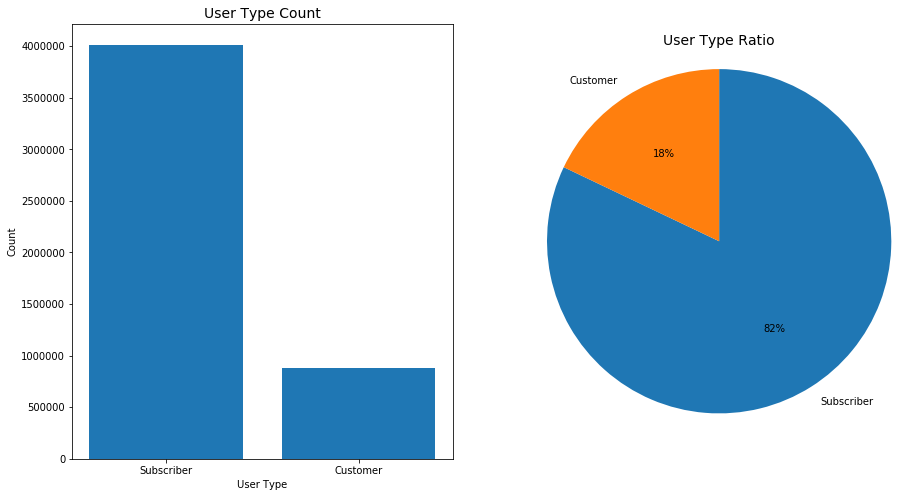

In [21]:
plt.figure(figsize=[15,8])

plt.subplot(1, 2, 1)
plt.bar(height = [rides.query("user_type == 'Subscriber'").shape[0], rides.query("user_type == 'Customer'").shape[0]], x = ['Subscriber', 'Customer'], );

plt.title('User Type Count', fontsize = 14);
plt.xlabel('User Type');
plt.ylabel('Count');


plt.subplot(1, 2, 2)
# percentage of subscribers and customers to use for labels
p1 = rides.query("user_type == 'Subscriber'").shape[0]/rides.shape[0]
p2 = rides.query("user_type == 'Customer'").shape[0]/rides.shape[0]

perc= [p1,p2]
plt.pie(perc, labels = ['Subscriber','Customer'], startangle = 90, counterclock = False, autopct='%1.0f%%')
plt.axis('square');

plt.title('User Type Ratio', fontsize = 14);


- Clearly the number of rides made by subsribers (82%) are greater than customers (18%). I can use this information in the next section by introducing another variable or by looking at a variable for only subscribers.

#### - duration_sec:
The duration of the rides in seconds is a continuies numeric, for that I'll histogram with bin size of 60 as a start (by minute).

Text(0.5, 0, 'log(Duration)')

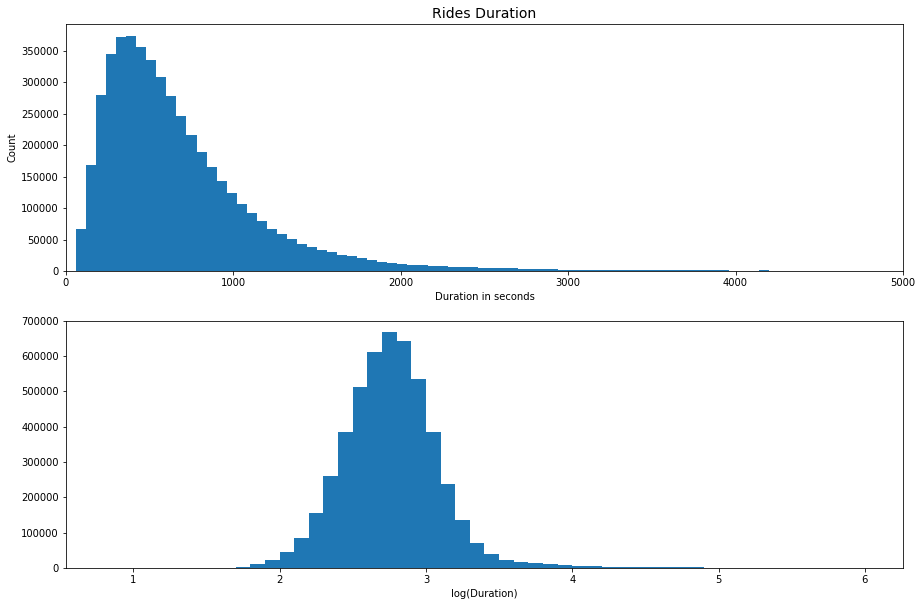

In [23]:
plt.figure(figsize=[15,10])

plt.subplot(2, 1, 1)
bin_edges = np.arange(0, rides['duration_sec'].max()+60, 60)
plt.hist(data = rides, x = 'duration_sec', bins = bin_edges);
plt.xlim(0,5000)
plt.title('Rides Duration', fontsize = 14);
plt.xlabel('Duration in seconds');
plt.ylabel('Count');


plt.subplot(2, 1, 2)
log_data = np.log10(rides['duration_sec'])
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges);
plt.xlabel('Rides Duration - Normalized');
plt.xlabel('log(Duration)')

# ten mins

- The original first plot is heavily skewed in a narrow area with a long tale so I used xlim to zoom in the interesting area and I plotted another histrogram using log10 for a normalized distribution.
- The plots tell us that most of the rides take 5 to 15 minutes, the peak majority is 10 minutes (log(600) = 2.8).

#### - start_station_name:
Here, I'll just take a look at the top ten start stations to look for something interseting.

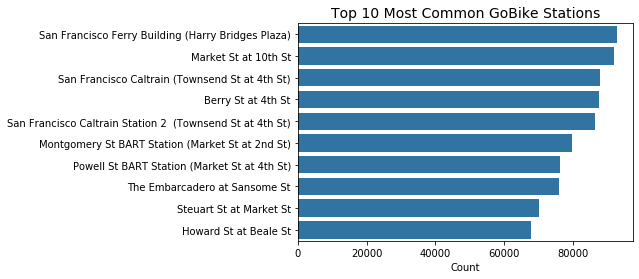

In [26]:
myorder = rides.start_station_name.value_counts()[:10].index

base_color = sb.color_palette()[0]
sb.countplot(data = rides, y = 'start_station_name', color = base_color, order = myorder);
#plt.xticks(rotation = 90)
plt.title('Top 10 Most Common GoBike Stations', fontsize = 14);
plt.xlabel('Count');
plt.ylabel('');

- The top stations include the San Francisco Ferry Building, Market st, San Francisco Caltrain,..etc. I can explore in the next section the relation between start and end stations or the relation between the station and duration of rides. 

#### - distance_km
Distance is a nother continues numeric, so I'll use histogram to plot it. For bin size I'll 0.5 km and zoom in on 0 to 6 km since they make up most of the data.

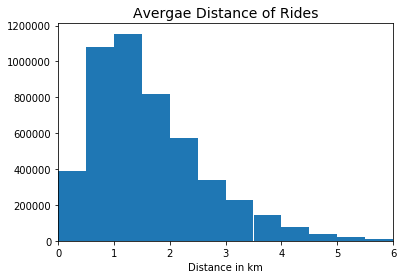

In [28]:
bin_edges = np.arange(0, rides['distance_km'].max()+0.5, 0.5)
plt.hist(data = rides, x = 'distance_km', bins = bin_edges);
plt.xlim(0,6)
plt.title('Avergae Distance of Rides', fontsize = 14);
plt.xlabel('Distance in km');
plt.ylabel('');

- From this graph, I can tell that majority of rides have 0.5 to 1.5 km distance between start and end stations. and a good number of rides go 1.5 to 2.5 in distance between stations. The remaining are either less than 500 meters or more than 2.5 km. I can use the distance against the duration column to find how much they're related to each other. 

#### year_month:
For this categorical type, I'll use bar (countplot) in three different subplots for each year 2017, 2018 and 2019 To see if the number of rides increase in certain months. The data for 2017 dtarts from June as downloaded.

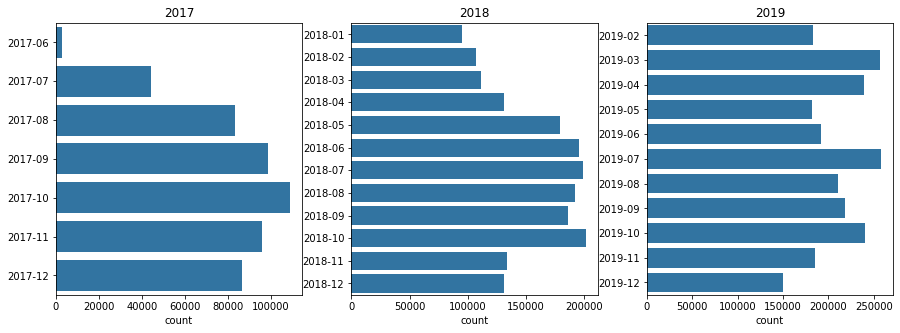

In [31]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
base_color = sb.color_palette()[0]
sb.countplot(data = rides.sort_values(by='year_month'), y = 'year_month', color = base_color,order=sorted(rides.year_month.unique())[:7]);
#plt.xticks(rotation = 90);
plt.title('2017')
plt.ylabel('');

plt.subplot(1, 3, 2)
sb.countplot(data = rides.sort_values(by='year_month'), y = 'year_month', color = base_color,order=sorted(rides.year_month.unique())[7:19]);
#plt.xticks(rotation = 90);
plt.title('2018')
plt.ylabel('');

plt.subplot(1, 3, 3)
sb.countplot(data = rides.sort_values(by='year_month'), y = 'year_month', color = base_color,order=sorted(rides.year_month.unique())[20:31]);
#plt.xticks(rotation = 90);
plt.title('2019')
plt.ylabel('');

- What all three plots have in common is that months for winter where the weather is not stable from November to March all have less rides comapred to other months. The remaining months have slighly different data for each year like for 2019 generally more rides were taken in spring (March - May) compared to summer where only July showed a high number of rides. Rides taken in 2018 showed great numbers for summer months. This difference between the two years can be linked to the high temprature witnessed by the city in 2019 due to climate changing. For 2017, since data starts from June, excluding spring most rides were taken in autumn (Sep - Nov). 

## Bivariate Exploration <a id='BE'></a>

First I want to see the relation between distance and duration. Since both are numerical data, I'm using scatter.

The correlation coefficient between rides' distance and duration:  0.038683578876139366


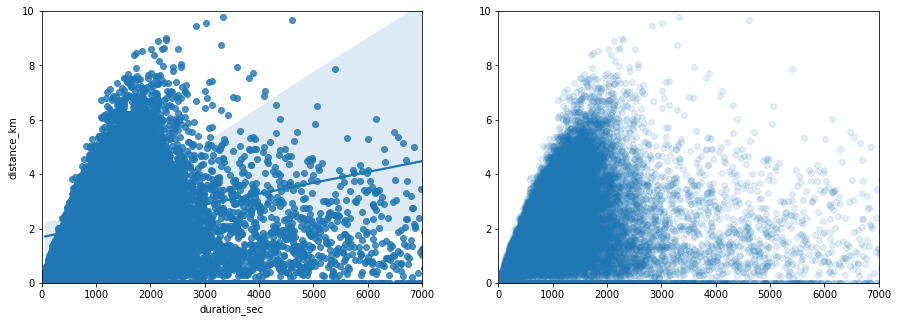

In [33]:
plt.figure(figsize = (15, 5))

samp = rides.sample(100000)
plt.subplot(1, 2, 1)
sb.regplot(data = samp, x = 'duration_sec', y = 'distance_km')
plt.xlim(0,7000)
plt.ylim(0,10)

plt.subplot(1, 2, 2)
plt.scatter(data = samp, x = 'duration_sec', y = 'distance_km', alpha = 1/8);
plt.xlim(0,7000)
plt.ylim(0,10)
print('The correlation coefficient between rides\' distance and duration: ',rides['duration_sec'].corr(rides['distance_km']))

- First I used seaborn's regplot function that combines scatterplot creation with regression function fitting for easer reading. As shown the visualization suffers from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables. The regression linear function shows a slighty positive relation between the two.
- I plotted another scatter plot where a used transparency to handle the overplotting.
- Both plots tell me the relationship between distance and duration is very small and positive.

I'll take quick look at the correlation coefficient between all numeric columns in my dataset, including discrete variable for ids.

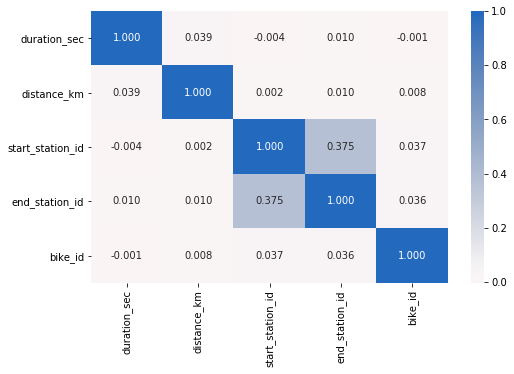

In [34]:
# list my numeric vars
numeric_vars = ['duration_sec', 'distance_km', 'start_station_id', 'end_station_id', 'bike_id']

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(rides[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

- Evidently, the correlation between distance and duration is very weak. There's no point of exploring the two variable together in the next section.
- This also tell me there's a relation between start and end stations that's positive. I may use this later.

Now I want to see if user type effects the duration of the ride of the distance between station. I'll explore the two side by side. One is categorical while the other is numerical for both so I'll use boxplot for this one:

(0, 5)

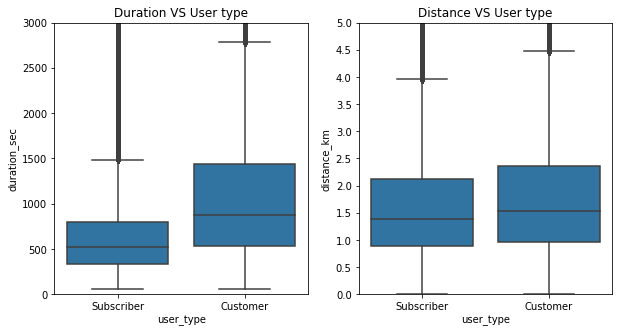

In [37]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.boxplot(data = rides, x = 'user_type', y = 'duration_sec',color = base_color)#, order = myorder );
plt.ylim(0,3000)
plt.title('Duration VS User type')

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
sb.boxplot(data = rides, x = 'user_type', y = 'distance_km',color = base_color)#, order = myorder );
plt.yticks(np.arange(0, 5+0.5, 0.5))
plt.title('Distance VS User type')

plt.ylim(0,5)


- From this I can tell that generally customers use their bikes for longer rides where the distance between station is greater compared to subscriber who probably use their bike for daily small rides.
- This is interesting to me, I'll use it the next section by introducing the year_month column to see if I can spot another pattern.


## Multivariate Exploration <a id='ME'></a>

Here I'll explore my variables of interest together. First I'll see duration of rides by year_month for both subscribers and customers. I'll use seaborn's pointplot to plot year_month and duration_sec and then I will introduce my third variable user_type by encoding with color using the 'hue' parameter:

Text(0.5, 1.0, 'Duration of Rides by Months for User Type')

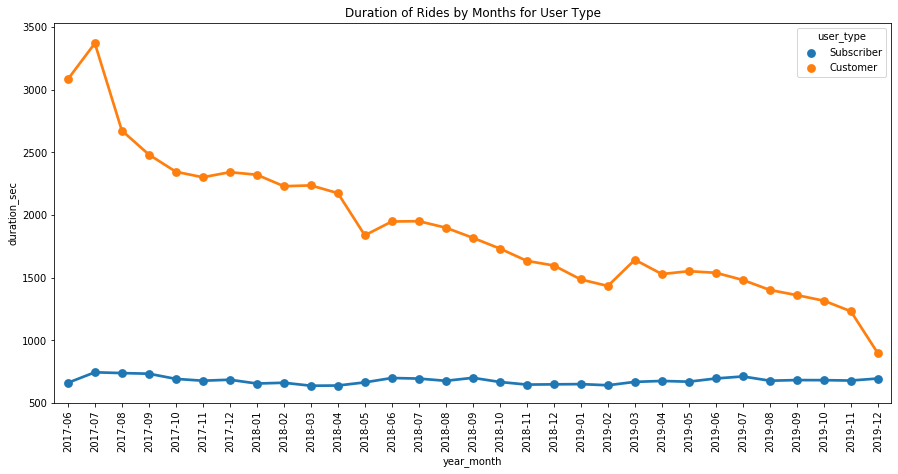

In [53]:
plt.figure(figsize = (15, 7))
sb.pointplot(data = rides.sort_values(by='year_month'), x = 'year_month', y = 'duration_sec',
             hue = 'user_type', ci = None);
plt.xticks(rotation = 90);
plt.title('Duration of Rides by Months for User Type')

- The duration of rides made by subscribers are far more less compared to customers and didn't change much with time. it also shows that rides made in cold months take slighly less time compared to other months for subscribers thoughout the years.

- Interestingly, the number of rides made by customers is not stable; it witnessed a big decline throughout the years. It's also very clear the duratoin of rides made by customers as shown in the previous section are much greater than subrsciber. Unlike sucsribers, the time of the year does not play a big role in number of rides made by customers.

I tried experimenting with different variables using other plots, but the multivariant plots I get are useless since there isnt enough features in the dataset to find another set of 3 related variables that can show me something interesting and new. But I'm still interested in my distance variable with the same features from the previous plot. I'll use clustered bar chart to show me the same relation but with distance instead of duration.

Text(0.5, 1.0, 'Distance of Rides by Months for User Type')

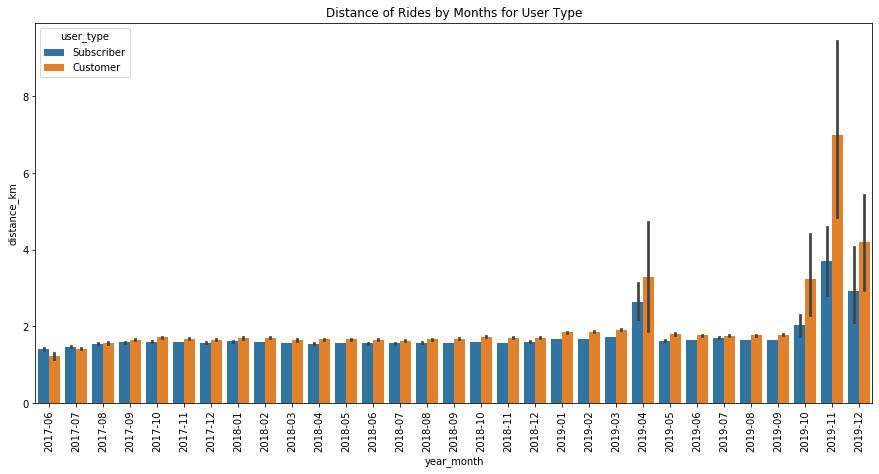

In [15]:
plt.figure(figsize = (15, 7))

ax = sb.barplot(data = rides.sort_values(by='year_month'), x = 'year_month', y = 'distance_km', hue = 'user_type')
#ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type')

plt.xticks(rotation = 90);
plt.title('Distance of Rides by Months for User Type')

- For the distance the difference between subscribers and customers is less comapred to duration and they tend to increase and decrease in sync.
- Overall, the amout on distance traveled between start to end station increased in recent years.